# =============================
# Object Detection using keras-yolo3 
# =============================

- https://github.com/qqwweee/keras-yolo3

## Microcontroller datasets 이용
- https://www.kaggle.com/tannergi/microcontroller-detection

## Convert darknet model to keras model

- YOLO V3 원래 모델을 keras model로 변경

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-11-02 12:40:04--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
접속 pjreddie.com (pjreddie.com)|128.208.4.108|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M   309KB/s    in 18m 30s 

2020-11-02 12:58:35 (218 KB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [ ]:
!python convert.py yolov3.cfg yolov3.weights model_data/yolo_weights.h5

Using TensorFlow backend.
/home/jihbae/anaconda3/envs/keras-yolo3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jihbae/anaconda3/envs/keras-yolo3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jihbae/anaconda3/envs/keras-yolo3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home

Parsing section convolutional_62
conv2d bn leaky (1, 1, 512, 256)
Parsing section convolutional_63
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_64
conv2d bn leaky (1, 1, 512, 256)
Parsing section convolutional_65
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_66
conv2d    linear (1, 1, 512, 255)
Parsing section yolo_1
Parsing section route_2
Parsing section convolutional_67
conv2d bn leaky (1, 1, 256, 128)
Parsing section upsample_1
Parsing section route_3
Concatenating route layers: [<tf.Tensor 'up_sampling2d_2/ResizeNearestNeighbor:0' shape=(?, ?, ?, 128) dtype=float32>, <tf.Tensor 'add_11/add:0' shape=(?, ?, ?, 256) dtype=float32>]
Parsing section convolutional_68
conv2d bn leaky (1, 1, 384, 128)
Parsing section convolutional_69
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_70
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_71
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_72
conv2d bn leaky (1, 1, 256

Saved Keras model to model_data/yolo_weights.h5
Read 62001757 of 62001757.0 from Darknet weights.


- YOLO V3 경량화 모델을 keras model로 변경

In [ ]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2020-11-02 13:00:35--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
접속 pjreddie.com (pjreddie.com)|128.208.4.108|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights.1’

yolov3-tiny.weights 100%[===================>]  33.79M   299KB/s    in 2m 48s  

2020-11-02 13:03:30 (206 KB/s) - ‘yolov3-tiny.weights.1’ saved [35434956/35434956]



In [ ]:
!python convert.py yolov3-tiny.cfg yolov3-tiny.weights model_data/tiny_yolo_weights.h5

## Convert Annotation

- Row format: image_file_path box1 box2 … boxN
- Box format: x_min,y_min,x_max,y_max,class_id (no space)

In [ ]:
import xml.etree.ElementTree as ET
from os import getcwd
import glob
!pwd

/home/jihbae/DeepLearning/object_detection/keras-yolo3


In [ ]:
# Object detection 클래스 설정
classes = ["Arduino_Nano", "Heltec_ESP32_Lora", "ESP8266", "Raspberry_Pi_3"]

def convert_annotation(annotation_voc, train_all_file):
    tree = ET.parse(annotation_voc)
    root = tree.getroot()

    for obj in root.iter('object'):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        if cls not in classes or int(difficult)==1: continue
        cls_id = classes.index(cls)
        xmlbox = obj.find('bndbox')
        b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
        train_all_file.write(" " + ",".join([str(a) for a in b]) + ',' + str(cls_id))

In [ ]:
train_all_file = open('./image_data/Microcontroller-Detection/train_all.txt', 'w')

# Get annotations_voc list
annotations_voc = glob.glob(f'./image_data/Microcontroller-Detection/train/*.xml')
for annotation_voc in annotations_voc:
    image_id = annotation_voc.split('/')[-1].split('.')[0]+'.jpg'
    train_all_file.write(f'./image_data/Microcontroller-Detection/train/{image_id}')
    convert_annotation(annotation_voc, train_all_file)
    train_all_file.write('\n')
        
train_all_file.close()        

## Custom 데이터로 Transfer Learning 수행

In [ ]:
# %load train.py
"""
Retrain the YOLO model for your own dataset.
"""
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
    annotation_path = 'image_data/Microcontroller-Detection/train_all.txt'
    log_dir = 'logs/000/'
    classes_path = 'model_data/micro_classes.txt'
    anchors_path = 'model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

    input_shape = (416,416) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
    else:
        model = create_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/yolo_weights.h5') # make sure you know what you freeze

    logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    val_split = 0.1
    with open(annotation_path) as f:
        lines = f.readlines()
    np.random.seed(10101)
    np.random.shuffle(lines)
    np.random.seed(None)
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val

    # Train with frozen layers first, to get a stable loss.
    # Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
    if True:
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred})

        batch_size = 32
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                epochs=50,
                initial_epoch=0,
                callbacks=[logging, checkpoint])
        model.save_weights(log_dir + 'trained_weights_stage_1.h5')

    # Unfreeze and continue training, to fine-tune.
    # Train longer if the result is not good.
    if True:
        for i in range(len(model.layers)):
            model.layers[i].trainable = True
        model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
        print('Unfreeze all of the layers.')

        batch_size = 16 # note that more GPU memory is required after unfreezing the body
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=100,
            initial_epoch=50,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
        model.save_weights(log_dir + 'trained_weights_final.h5')

    # Further training if needed.


def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo_weights.h5'):
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)

if __name__ == '__main__':
    _main()


Create YOLOv3 model with 9 anchors and 4 classes.
Load weights model_data/yolo_weights.h5.
Freeze the first 249 layers of total 252 layers.
Train on 128 samples, val on 14 samples, with batch size 32.
Epoch 1/50
4/4 [==============================] - 8s 2s/step - loss: 9796.7102 - val_loss: 7341.4600
Epoch 2/50
4/4 [==============================] - 5s 1s/step - loss: 6511.8025 - val_loss: 4549.6616
Epoch 3/50
4/4 [==============================] - 6s 2s/step - loss: 4169.7187 - val_loss: 2988.3872
Epoch 4/50
4/4 [==============================] - 2s 535ms/step - loss: 2697.1954 - val_loss: 1909.9102
Epoch 5/50
4/4 [==============================] - 2s 536ms/step - loss: 1799.2062 - val_loss: 1389.2507
Epoch 6/50
4/4 [==============================] - 3s 692ms/step - loss: 1240.1727 - val_loss: 918.1740
Epoch 7/50
4/4 [==============================] - 6s 1s/step - loss: 917.4420 - val_loss: 698.6512
Epoch 8/50
4/4 [==============================] - 6s 1s/step - loss: 691.9591 - val_lo

Epoch 79/100
8/8 [==============================] - 6s 710ms/step - loss: 14.7670 - val_loss: 15.0149

Epoch 00079: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.
Epoch 80/100
8/8 [==============================] - 6s 719ms/step - loss: 14.5770 - val_loss: 14.5490
Epoch 81/100
8/8 [==============================] - 6s 733ms/step - loss: 14.4368 - val_loss: 14.3566
Epoch 82/100
8/8 [==============================] - 6s 726ms/step - loss: 14.8570 - val_loss: 14.3226
Epoch 83/100
8/8 [==============================] - 6s 738ms/step - loss: 14.5220 - val_loss: 15.7061
Epoch 84/100
8/8 [==============================] - 6s 733ms/step - loss: 14.6333 - val_loss: 14.8640
Epoch 85/100
8/8 [==============================] - 6s 733ms/step - loss: 14.4465 - val_loss: 14.7174

Epoch 00085: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.
Epoch 86/100
8/8 [==============================] - 6s 730ms/step - loss: 14.6761 - val_loss: 15.1281
Epoch 87/100
8/8 [====

## Custom 데이터셋으로 학습한 모델 테스트

logs/000/trained_weights_final.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 1 boxes for img
Heltec_ESP32_Lora 0.57 (432, 269) (520, 387)
1.9552753850002773


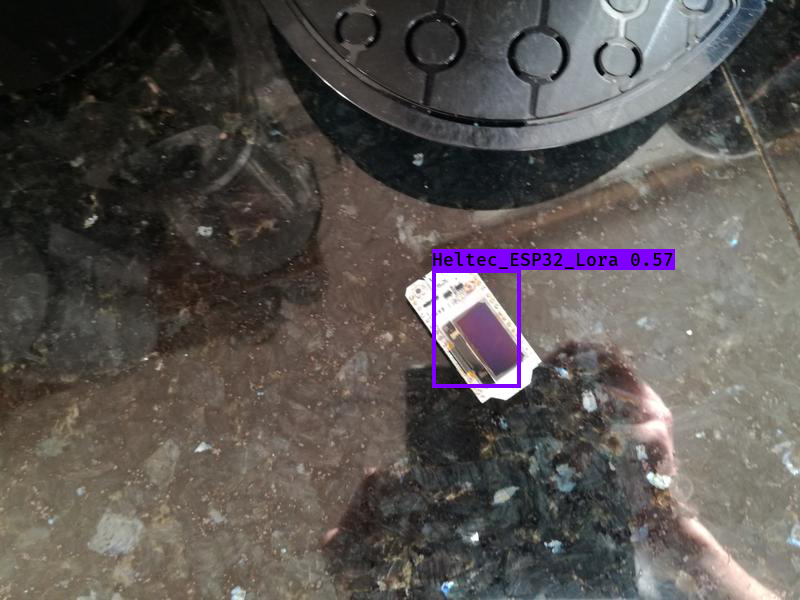

In [ ]:
from IPython.display import display
from PIL import Image
from yolo import YOLO

def objectDetection(file, model_path, class_path):
    yolo = YOLO(model_path=model_path, classes_path=class_path, anchors_path='model_data/yolo_anchors.txt')
    image = Image.open(file)
    result_image = yolo.detect_image(image)
    display(result_image)

#objectDetection('image_data/Microcontroller-Detection/test/IMG_20181228_102636.jpg', 'logs/000/trained_weights_final.h5', 'model_data/micro_classes.txt')
objectDetection('image_data/Microcontroller-Detection/test/IMG_20181228_102641.jpg', 'logs/000/trained_weights_final.h5', 'model_data/micro_classes.txt')
#objectDetection('image_data/Microcontroller-Detection/test/IMG_20181228_102658.jpg', 'logs/000/trained_weights_final.h5', 'model_data/micro_classes.txt')
#objectDetection('image_data/Microcontroller-Detection/test/IMG_20181228_102706.jpg', 'logs/000/trained_weights_final.h5', 'model_data/micro_classes.txt')
#objectDetection('image_data/Microcontroller-Detection/test/IMG_20181228_102745.jpg', 'logs/000/trained_weights_final.h5', 'model_data/micro_classes.txt')
#objectDetection('image_data/Microcontroller-Detection/test/IMG_20181228_102749.jpg', 'logs/000/trained_weights_final.h5', 'model_data/micro_classes.txt')
#objectDetection('image_data/Microcontroller-Detection/test/IMG_20181228_102757.jpg', 'logs/000/trained_weights_final.h5', 'model_data/micro_classes.txt')